# Машинне навчання
## Лабораторна робота №1. Авельцев Йосип
### 1. Визначити типи ознак та їх допустимі значення, ознайомившись з описанням набору даних.

### 2. Завантажити набір даних у DataFrame і вивести на екран перші декілька рядків.

In [705]:
from contextlib import suppress
from pprint import pprint
import pandas as pd

titanic_file_path = 'train.csv'
titanic_data = pd.read_csv(titanic_file_path)

titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Програмно встановити назви стовпців DataFrame, якщо у файлі з набором даних
вони не містяться. Назви стовпців є в описанні набору даних.

Назви містяться.

### 4. Вивести на екран кількість рядків та стовпців у DataFrame, типи стовпців DataFrame.


In [706]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 5. Вивести таблицю з основними характеристиками кожної ознаки (для кількісних
ознак – мінімум, максимум, середнє, середньоквадратичне відхилення, 1-й, 2-й та
3-й квартилі; для якісних – кількість унікальних значень, модальне значення та його
частота).

Кількісні:

In [707]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Якісні:

In [708]:
titanic_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Williams, Mr. Leslie",male,1601,G6,S
freq,1,577,7,4,644


### 6. Перевірити наявність пропусків в наборі даних, вивести на екран кількість
пропущених значень у кожному стовпці.

In [709]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 8. Якщо  у  наборі  даних  є  пропуски,  видалити  або  заповнити  їх.  Потрібно  вміти видаляти усі та лише частину рядків/стовпців з пропусками, а також заповнювати пропуски середнім значенням/медіаною/модою по усій вибірці та по даним лише відповідного класу.

In [710]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())
# titanic_data = titanic_data.dropna()
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 7. Перевірити  наявність  аномальних  значень  в  наборі  даних.  Для  кожного  стовпця вивести перелік знайдених аномальних значень. Якщо аномалії знайдено, вилучити їх або помітити як пропущені.

    https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [711]:
import matplotlib.pyplot as plt
import numpy as np

# def print_boxplots(data):
#     for col in data.columns:
#         plt.figure()
#         sns.boxplot(x=data[col])
#
titanic_data_num = titanic_data.select_dtypes(include=[np.number])
# print_boxplots(titanic_data_num)

In [712]:
from scipy import stats
import numpy as np

print(titanic_data_num.shape)
# titanic_data_num = titanic_data_num[(np.abs(stats.zscore(titanic_data_num)) < 3).all(axis=1)]
print(titanic_data_num.shape)

z = np.abs(stats.zscore(titanic_data_num))

(arr1, arr2) = np.where(z > 3)

outliers = {}
for row, col in zip(arr1, arr2):
    if titanic_data_num.columns[col] not in outliers:
        outliers[titanic_data_num.columns[col]] = [titanic_data_num.loc[row][col]]
    else:
        outliers[titanic_data_num.columns[col]].append(titanic_data_num.loc[row][col])
pprint(outliers)

titanic_data[titanic_data_num.columns] = titanic_data_num
titanic_data = titanic_data.dropna()


(891, 7)
(891, 7)
{'Age': [71.0, 70.5, 71.0, 80.0, 70.0, 70.0, 74.0],
 'Fare': [263.0,
          263.0,
          247.5208,
          512.3292,
          247.5208,
          262.375,
          263.0,
          211.5,
          227.525,
          263.0,
          221.7792,
          227.525,
          512.3292,
          211.3375,
          227.525,
          227.525,
          211.3375,
          512.3292,
          262.375,
          211.3375],
 'Parch': [5.0,
           5.0,
           3.0,
           4.0,
           4.0,
           3.0,
           4.0,
           4.0,
           5.0,
           5.0,
           6.0,
           3.0,
           3.0,
           3.0,
           5.0],
 'SibSp': [4.0,
           4.0,
           5.0,
           4.0,
           5.0,
           4.0,
           8.0,
           4.0,
           4.0,
           8.0,
           4.0,
           8.0,
           4.0,
           4.0,
           4.0,
           4.0,
           8.0,
           5.0,
           5.0,
     

### 9. Перевірити, чи збалансовані класи. Для цього побудувати стовпчасту або кругову діаграму, що відображає долю об’єктів кожного класу в наборі даних.


([<matplotlib.patches.Wedge at 0x7f2b2766fed0>,
 [Text(-0.5400934322180124, 0.9582792309525274, '1'),
  Text(0.5400934322180128, -0.9582792309525272, '0')],
 [Text(-0.2945964175734613, 0.5226977623377421, '66.3%'),
  Text(0.2945964175734615, -0.5226977623377421, '33.7%')])

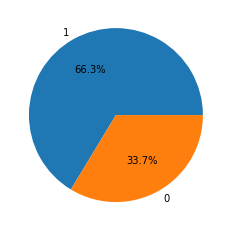

In [713]:
s = titanic_data["Survived"].value_counts() / len(titanic_data) * 100
plt.pie(s.values, labels=s.index, autopct='%.1f%%')

### 10. Виконати перетворення якісних ознак. Необхідно опанувати два типи перетворень: перетворення  кожної  якісної  ознаки  в  набір  бінарних ознак  (даммі  змінних)  та перекодування значень ознаки в числа.

In [714]:
titanic_data_1 = pd.get_dummies(data=titanic_data, columns=titanic_data.select_dtypes(include=np.object).columns, drop_first=True)
titanic_data_1.head()

titanic_data["Sex"] = titanic_data["Sex"].factorize()[0]
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S


### 11. Нормалізувати або стандартизувати кількісні ознаки.

In [715]:
titanic_data_num_norm = (titanic_data_num - titanic_data_num.mean()) / (titanic_data_num.max() - titanic_data_num.min())
titanic_data[titanic_data_num_norm.columns] = titanic_data_num_norm
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,-0.498876,0.616162,-0.654321,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.104309,0.059624,-0.063599,PC 17599,0.076277,C85,C
3,-0.496629,0.616162,-0.654321,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.066611,0.059624,-0.063599,113803,0.040786,C123,S
6,-0.493258,-0.383838,-0.654321,"McCarthy, Mr. Timothy J",1,0.305364,-0.065376,-0.063599,17463,0.038370,E46,S
10,-0.488764,0.616162,0.345679,"Sandstrom, Miss. Marguerite Rut",0,-0.322934,0.059624,0.103068,PP 9549,-0.030262,G6,S
11,-0.487640,0.616162,-0.654321,"Bonnell, Miss. Elizabeth",0,0.355628,-0.065376,-0.063599,113783,-0.011036,C103,S


### 12. Вилучити  з  набору  даних  ознаки,  які  однозначно  не  можуть  бути  корисні  в подальшому (наприклад, id, ознаки з одного унікального значення або що містять більше 50% пропущених значень).

In [716]:
titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)
titanic_data["Cabin"] = titanic_data["Cabin"].notnull().astype(int)

titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
1,0.616162,-0.654321,0,0.104309,0.059624,-0.063599,0.076277,1
3,0.616162,-0.654321,0,0.066611,0.059624,-0.063599,0.040786,1
6,-0.383838,-0.654321,1,0.305364,-0.065376,-0.063599,0.038370,1
10,0.616162,0.345679,0,-0.322934,0.059624,0.103068,-0.030262,1
11,0.616162,-0.654321,0,0.355628,-0.065376,-0.063599,-0.011036,1
